## EXPLORACION

In [52]:
# Habilita la visualización de gráficos en línea en los notebooks de Jupyter
%matplotlib inline

# Importa el módulo de advertencias de la biblioteca estándar de Python
import warnings

# Ignora todas las advertencias
warnings.filterwarnings('ignore')

# Ignora advertencias específicas de la categoría 'DeprecationWarning'
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Importa la biblioteca pandas y le asigna el alias 'pd'
import pandas as pd

# Configura pandas para mostrar hasta 100 columnas
pd.options.display.max_columns = 100

# Importa el módulo 'pyplot' de la biblioteca 'matplotlib' y le asigna el alias 'plt'
from matplotlib import pyplot as plt

# Importa la biblioteca numpy y le asigna el alias 'np'
import numpy as np

# Importa la biblioteca seaborn y le asigna el alias 'sns'
import seaborn as sns

# Importa el módulo 'pylab' de matplotlib y le asigna el alias 'plot'
import pylab as plot

# Configuración de parámetros para matplotlib
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}

# Actualiza los parámetros de matplotlib con los valores especificados
plot.rcParams.update(params)

In [53]:
#cargar el training set
data = pd.read_csv('train.csv')
print(data.shape)

(891, 12)


In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. **PassengerId:** Un identificador único asignado a cada pasajero.

2. **Survived:** Indica si el pasajero sobrevivió o no al desastre del Titanic. Puede tener valores:
    - 0: No sobrevivió
    - 1: Sobrevivió

4. **Pclass (Clase del Pasajero):** La clase del boleto del pasajero. Puede tener valores:
    - 1: Primera clase
    - 2: Segunda clase
    - 3: Tercera clase

5. **Name (Nombre):** El nombre del pasajero.

6. **Sex (Género):** El género del pasajero. Puede tener valores:
    - Male: Hombre
    - Female: Mujer

7. **Age (Edad):** La edad del pasajero.

8. **SibSp:** El número de hermanos o cónyuges a bordo del Titanic.

9. **Parch:** El número de padres o hijos a bordo del Titanic.

10. **Ticket (Número de Boleto):** El número del boleto.

11. **Fare (Tarifa):** La tarifa pagada por el pasajero.

12. **Cabin (Cabina):** El número de la cabina donde se alojaba el pasajero.

13. **Embarked (Puerto de Embarque):** El puerto donde el pasajero embarcó en el Titanic. Puede tener valores:
    - C: Cherbourg
    - Q: Queenstown
    - S: Southampton

In [55]:
unique_values = data[['Survived','Pclass', 'Sex', 'SibSp', 'Embarked']].apply(lambda col: col.unique())
unique_values

Survived                   [0, 1]
Pclass                  [3, 1, 2]
Sex                [male, female]
SibSp       [1, 0, 3, 4, 2, 5, 8]
Embarked           [S, C, Q, nan]
dtype: object

In [56]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S


In [57]:
#describir los datos - faltan registros
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
# Calcular la suma de NaN por columna
nan_sum = data.isna().sum()
nan_sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
#llenar el resto con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


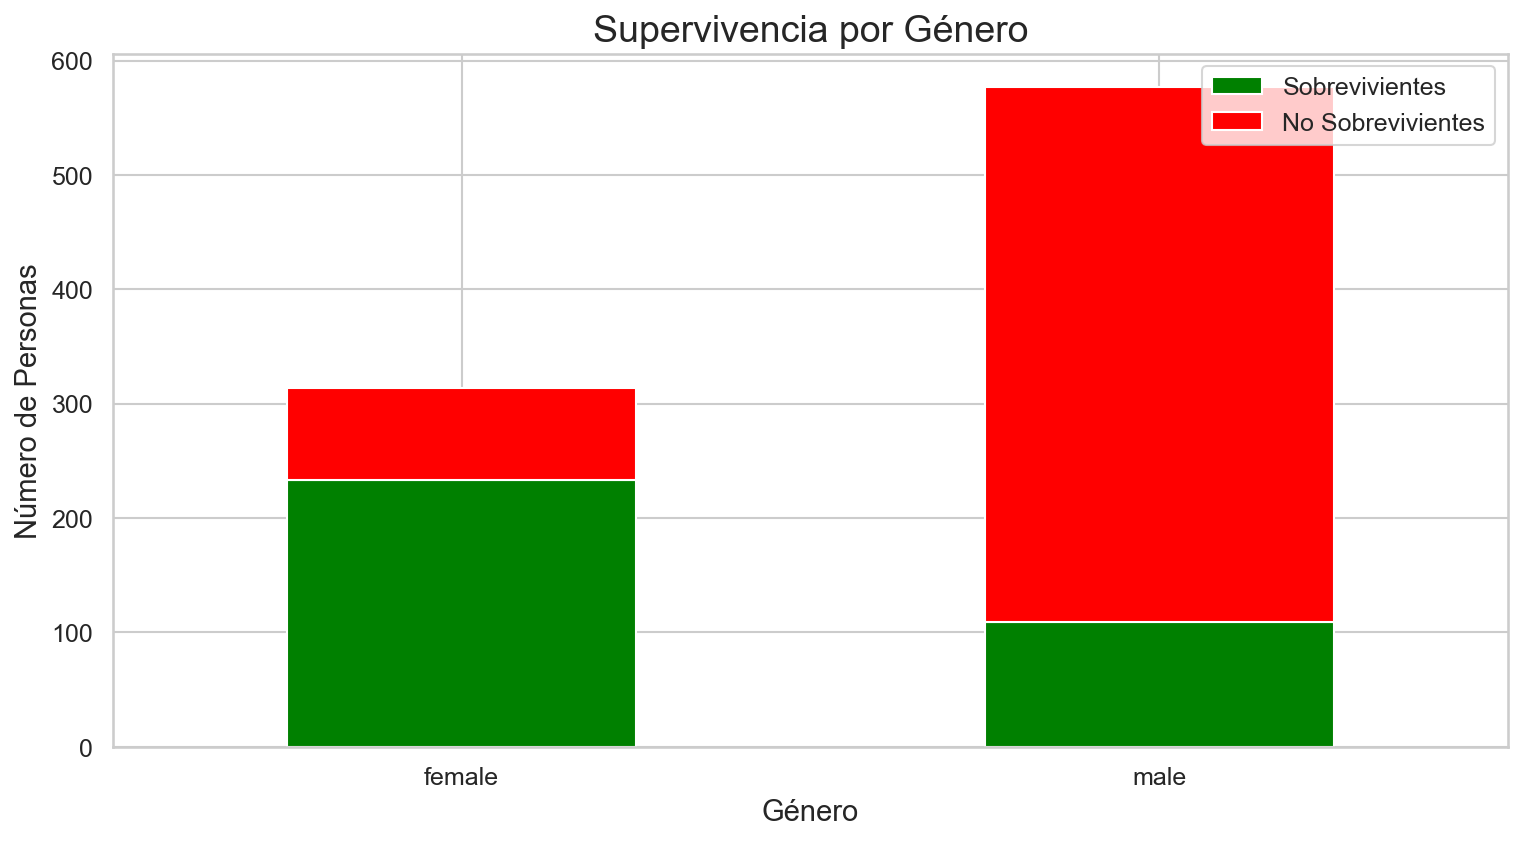

In [60]:
# Visualización - supervivencia por género
data['Died'] = 1 - data['Survived']

# Agrupar por género y calcular la suma de supervivientes y no supervivientes
gender_survival = data.groupby('Sex').agg('sum')[['Survived', 'Died']]

# Configurar colores y etiquetas
colors = ['#008000', '#FF0000']  # Verde y rojo
labels = ['Sobrevivientes', 'No Sobrevivientes']

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 6))
gender_survival.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Añadir etiquetas y título
plt.title('Supervivencia por Género', fontsize=18)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Número de Personas', fontsize=14)

# Añadir leyenda
ax.legend(labels, loc='upper right', fontsize=12)

# Mejorar la apariencia
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

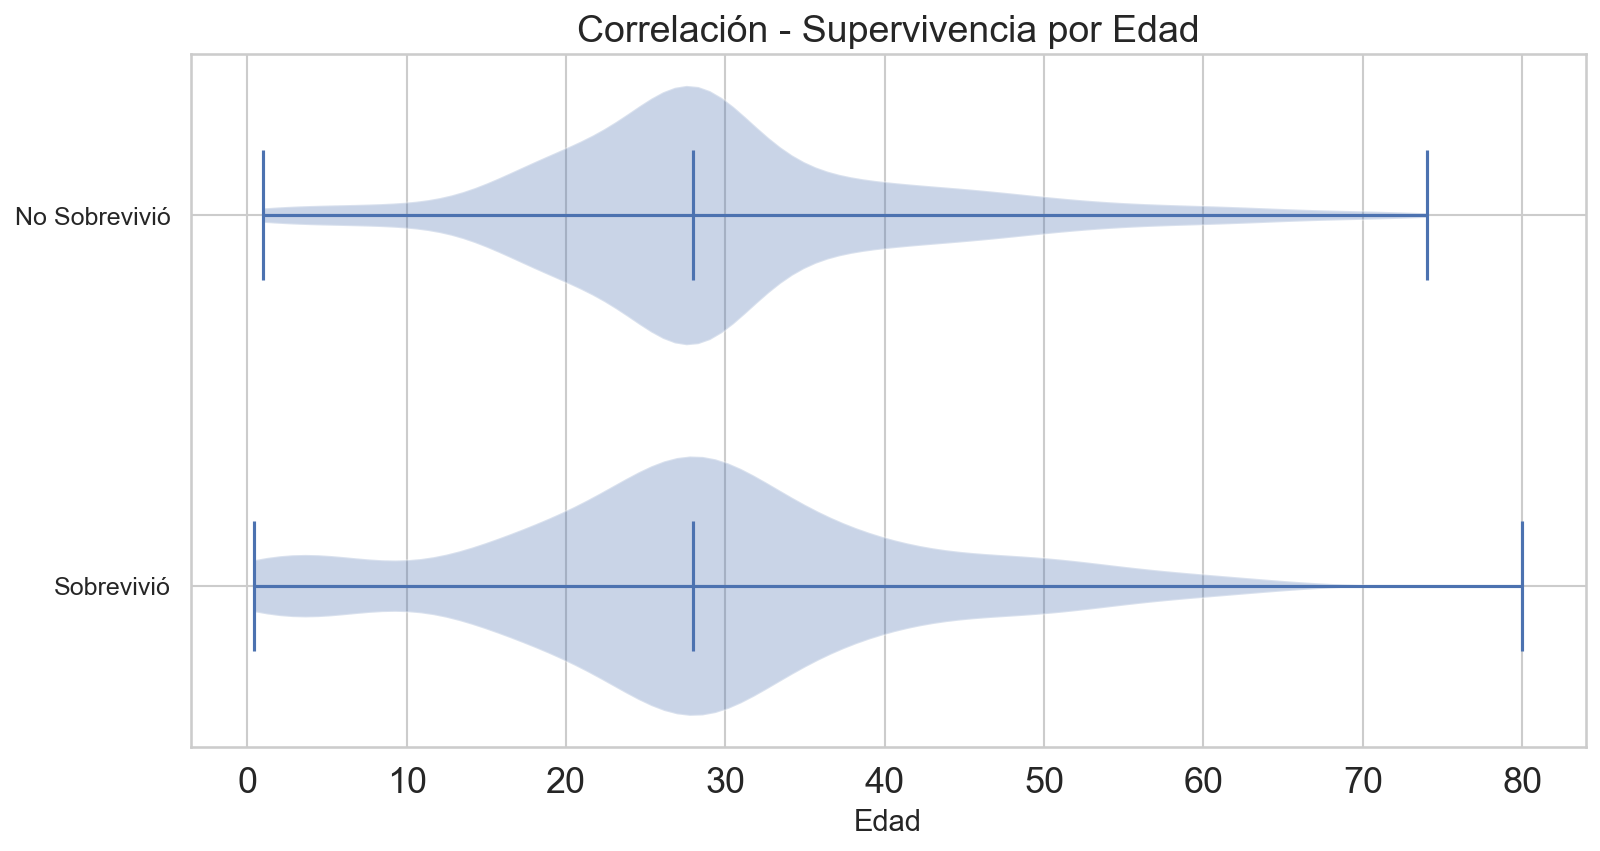

In [61]:
#Correlación - supervivencia por edad
# Crear una figura
fig, ax = plt.subplots(figsize=(12, 6))

# Dividir los datos en dos grupos (sobrevivientes y no sobrevivientes)
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

# Crear gráficos de violín para cada grupo
ax.violinplot([survived['Age'].dropna().values, not_survived['Age'].dropna().values], 
              showmedians=True, showextrema=True, vert=False, widths=0.7, positions=[1, 2],)

# Añadir etiquetas y título
plt.title('Correlación - Supervivencia por Edad', fontsize=18)
plt.yticks([1, 2], ['Sobrevivió', 'No Sobrevivió'], fontsize=12)
plt.xlabel('Edad', fontsize=14)

# Mostrar el gráfico
plt.show()

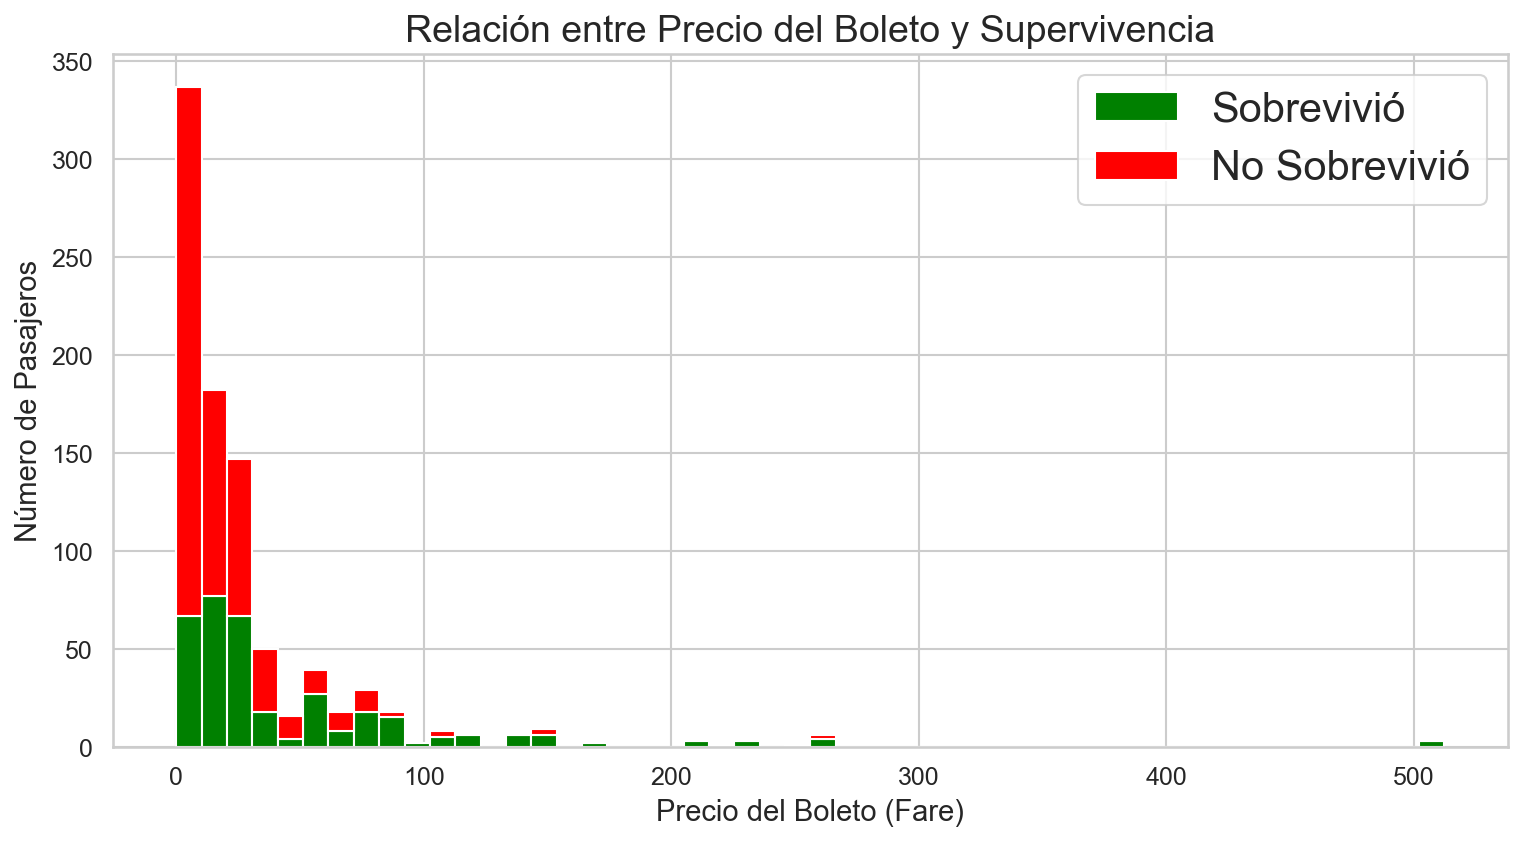

In [62]:
# Crear una figura
figure = plt.figure(figsize=(12, 6))

# Histograma para sobrevivientes (verde) y no sobrevivientes (rojo)
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']],
         stacked=True, color=['green', 'red'],
         bins=50, label=['Sobrevivió', 'No Sobrevivió'])

# Añadir etiquetas y título
plt.title('Relación entre Precio del Boleto y Supervivencia', fontsize=18)
plt.xlabel('Precio del Boleto (Fare)', fontsize=14)
plt.ylabel('Número de Pasajeros', fontsize=14)
plt.legend()

# Mejorar la apariencia
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

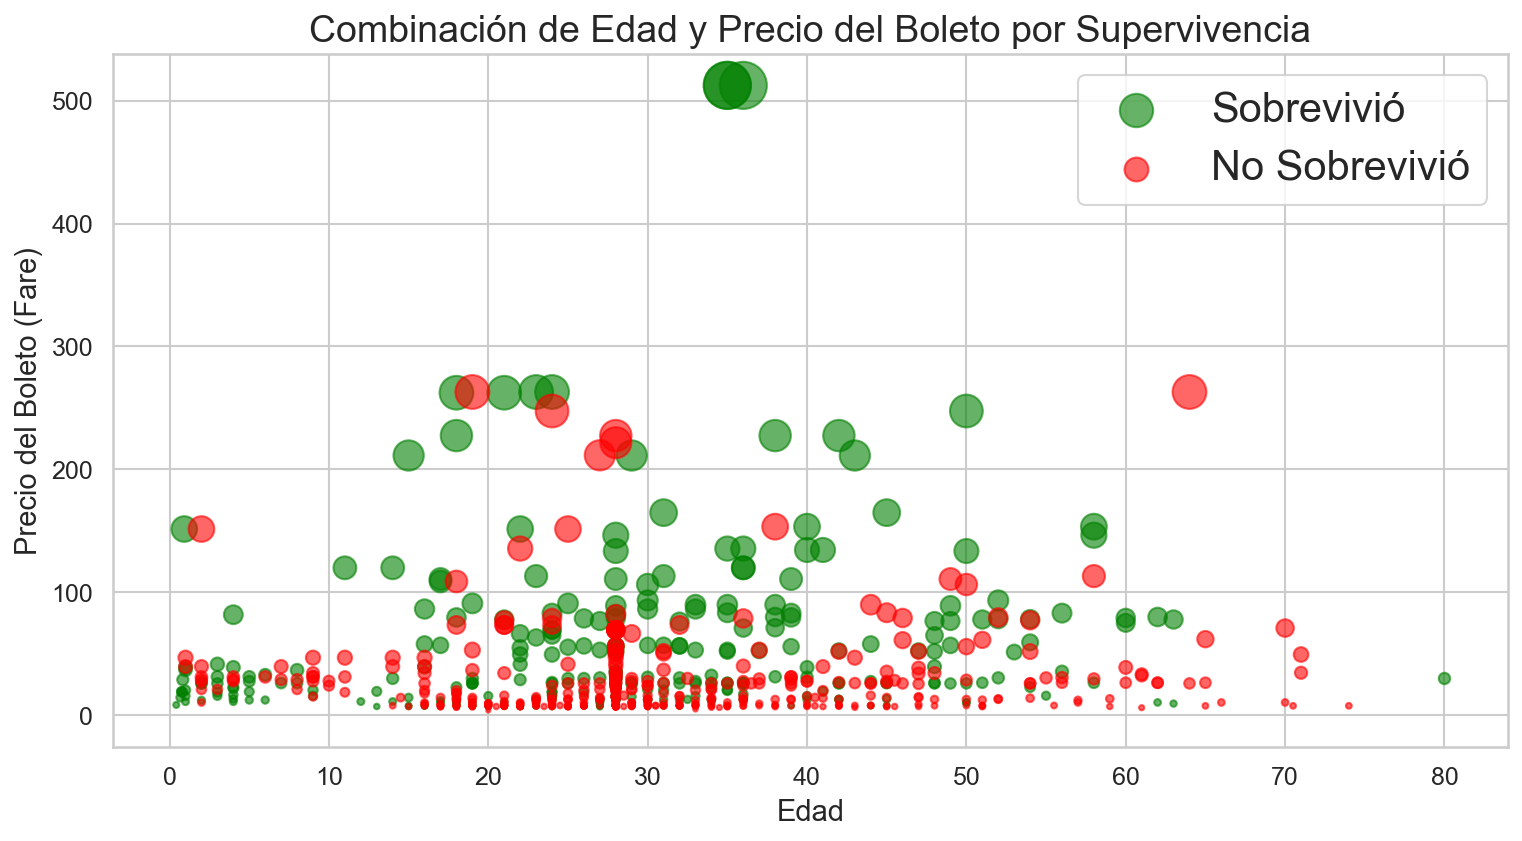

In [63]:
#combinar edad y precio 
# Crear una figura
plt.figure(figsize=(12, 6))

# Scatter plot para sobrevivientes (verde) y no sobrevivientes (rojo)
plt.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
            c='green', s=data[data['Survived'] == 1]['Fare'], alpha=0.6, label='Sobrevivió')

plt.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
            c='red', s=data[data['Survived'] == 0]['Fare'], alpha=0.6, label='No Sobrevivió')

# Añadir etiquetas y título
plt.title('Combinación de Edad y Precio del Boleto por Supervivencia', fontsize=18)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Precio del Boleto (Fare)', fontsize=14)
plt.legend()

# Mejorar la apariencia
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

### PRACTICA 1 - hacer un análisis similar con otra categoría ej. lugar de embarque. ¿Qué se puede concluir?

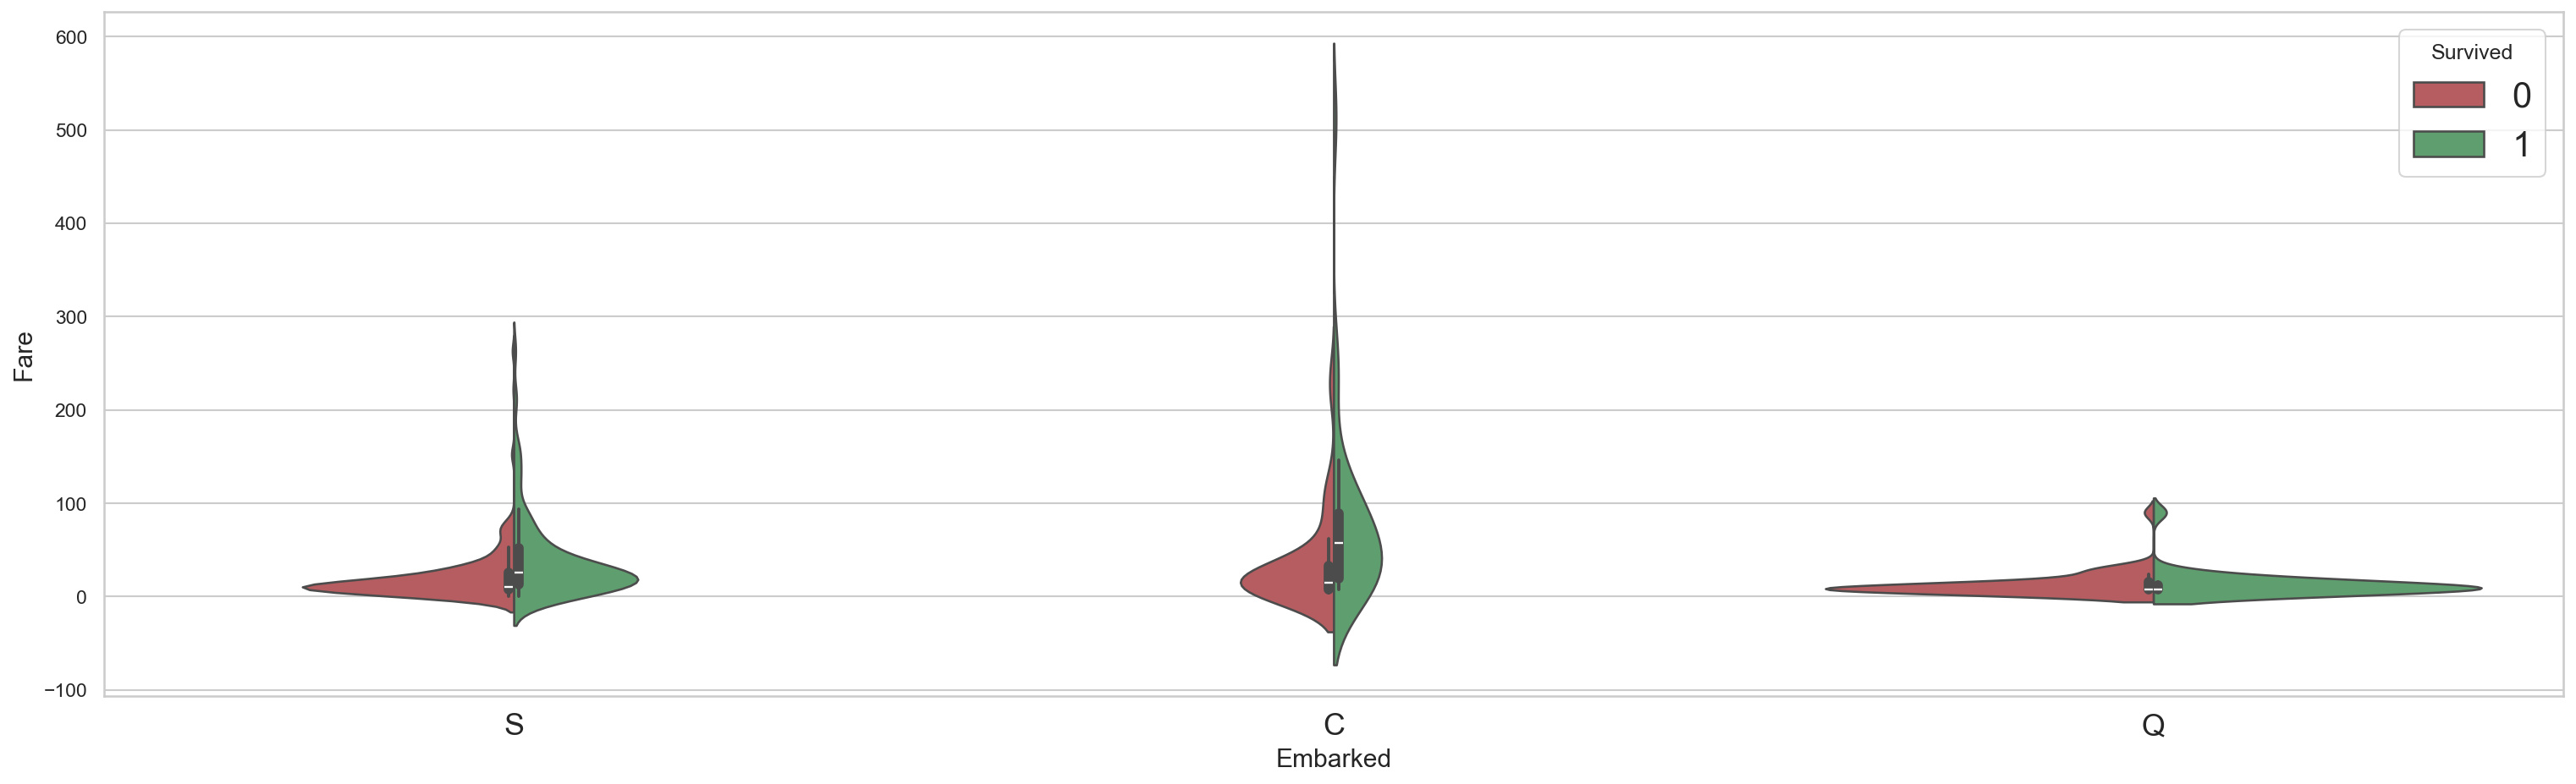

In [64]:
#SOLUCION 1
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

## FEATURE ENGINEERING

In [76]:
#helper
def status(feature):
    print('Processing', feature, ': ok')

In [81]:
# Obtener datos combinados
def get_combined_data():
    train = pd.read_csv('train.csv') 
    test = pd.read_csv('test.csv')
    
    # Guardar objetivos y eliminar 'Survived' de train
    targets = train.Survived
    train.drop(['Survived'], axis=1, inplace=True)
    
    # Combinar datos utilizando concat
    combined = pd.concat([train, test], ignore_index=True)
    
    return combined

In [84]:
combined = get_combined_data()
combined.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
593,594,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
51,52,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
559,560,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
746,747,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S


In [85]:
#extraer los titulos de los nombres
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # extraer título de cada nombre
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    # mapear cada titulo
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [86]:
combined = get_titles()
combined.head()

Processing Title : ok


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [87]:
#todo fue procesado?
combined[combined['Title'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [88]:
#ingeniería de la edad
print(combined.iloc[:891].Age.isnull().sum()) #TRAIN
print(combined.iloc[891:].Age.isnull().sum()) #TEST

177
86


In [96]:
# Crear grupos y calcular la mediana
grouped_train = combined.iloc[:891].groupby(['Sex', 'Pclass', 'Title'])
print(grouped_train)
grouped_median_train = grouped_train.median()
print(grouped_median_train)
# grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
# grouped_median_train.head()

TypeError: agg function failed [how->median,dtype->object]

In [86]:
#procesar edad
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global combined
    # llenar los elementos vacíos
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [87]:
combined = process_age()

Processing age : ok


In [88]:
#procesar nombres
def process_names():
    global combined
    # drop name
    combined.drop('Name', axis=1, inplace=True)
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1) 
    # drop title
    combined.drop('Title', axis=1, inplace=True)
    status('names')
    return combined

In [89]:
combined = process_names()
combined.head()

Processing names : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [90]:
#procesar precio
def process_fares():
    global combined
    # reemplazar con el promedio
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [91]:
combined = process_fares()

Processing fare : ok


In [92]:
#PRACTICA 2-- realizar un procesamiento similar para embarque - faltan valores

In [93]:
#SOLUCION procesar embarque
def process_embarked():
    global combined
    # reemplazar con S - el mas frecuente
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [94]:
combined = process_embarked()
combined.head()

Processing embarked : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [95]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

print(train_cabin)
print(test_cabin)

{'D', 'G', 'T', 'U', 'F', 'A', 'E', 'B', 'C'}
{'D', 'G', 'U', 'F', 'A', 'E', 'B', 'C'}


In [96]:
#procesar cabina
def process_cabin():
    global combined    
    # reemplazar por U
    combined.Cabin.fillna('U', inplace=True)
    # mapear a cada letra
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)
    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

In [97]:
combined = process_cabin()
combined.head()

Processing cabin : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [98]:
#procesar sexo
from sklearn.preprocessing import LabelEncoder

def process_sex():
    global combined
    # cambiar a número
    LE = LabelEncoder()
    combined['Sex'] = LE.fit_transform(combined['Sex'])
    status('Sex')
    return combined

In [100]:
combined = process_sex()
combined.head(10)

Processing Sex : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,3,1,26.0,0,0,330877,8.4583,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,1,1,54.0,0,0,17463,51.8625,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7,3,1,2.0,3,1,349909,21.0750,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8,3,0,27.0,0,2,347742,11.1333,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
9,2,0,14.0,1,0,237736,30.0708,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [101]:
#procesar clase
def process_pclass():  
    global combined
    # codificar
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    # agregar dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    # quitar "Pclass"
    combined.drop('Pclass',axis=1,inplace=True) 
    status('Pclass')
    return combined

In [105]:
combined.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [119]:
#procesar ticket
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    #sum(1 for _ in filter(lambda x: x > 3, n))
    res = len(ticket)
    if res > 0:
        return ticket[0]
    else: 
        return 'XXX'

tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

print(len(tickets))
#37

def process_ticket():  
    global combined
    # extraer prefijo
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        res = len(ticket)
        if res > 0:
            return ticket[0]
        else: 
            return 'XXX'
    
    # dummy:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

37


In [120]:
combined = process_ticket()
combined.head()

Processing Ticket : ok


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [121]:
#crear variables familia
def process_family():
    global combined
    # tamaño de familia
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    # crear otros tamaños
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    status('family')
    return combined

In [122]:
combined = process_family()
print(combined.shape)

Processing family : ok
(1309, 67)


## EXTRA: MODELS

In [129]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [130]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [133]:
def recover_train_test_target():
    global combined
    targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]  
    return train, test, targets

In [135]:
train, test, targets = recover_train_test_target()

In [136]:
#muchos campos, estimar importancia de cada uno
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

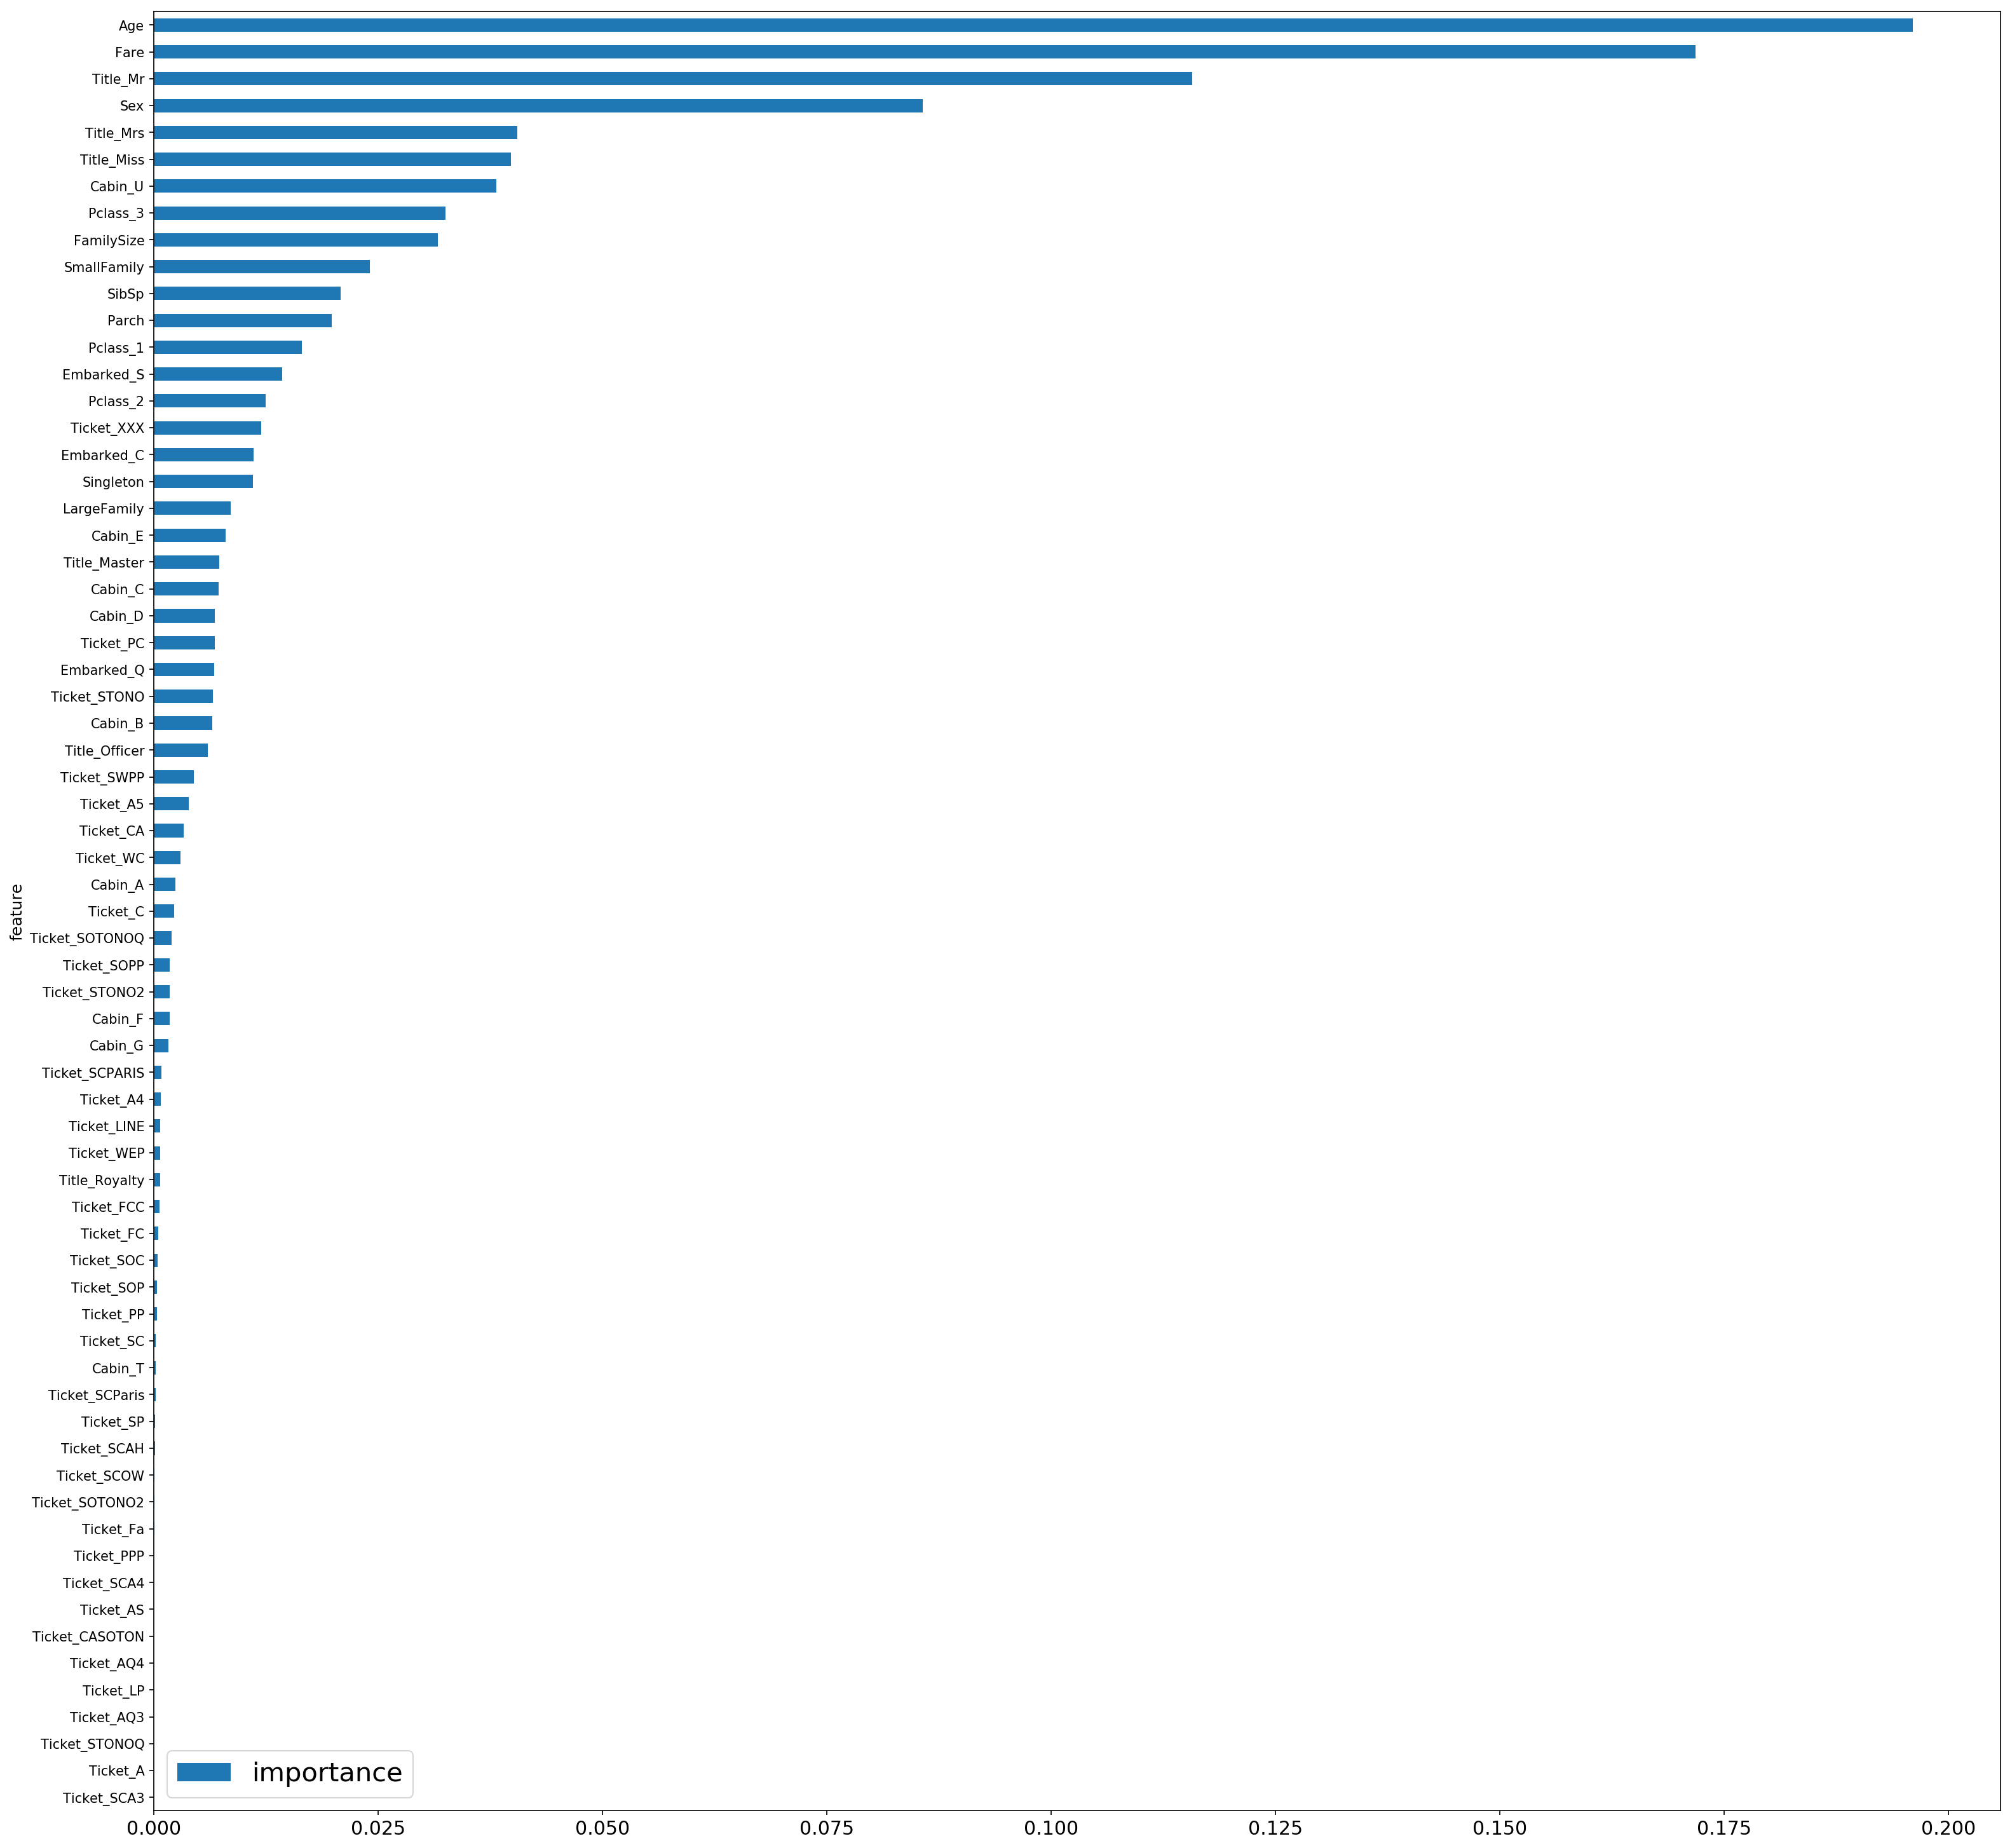

In [137]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

In [138]:
#seleccionar campos más relevantes
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

test_reduced = model.transform(test)
print(test_reduced.shape)

(891, 13)
(418, 13)


In [140]:
print(train_reduced)

[[ 1. 22.  1. ...  1.  2.  1.]
 [ 0. 38.  1. ...  0.  2.  1.]
 [ 0. 26.  0. ...  1.  1.  0.]
 ...
 [ 0. 18.  1. ...  1.  4.  1.]
 [ 1. 26.  0. ...  0.  1.  0.]
 [ 1. 32.  0. ...  1.  1.  0.]]


In [141]:
#evaluación
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8181721172556651
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8204193082669009
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8136777352331931
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.830525390747599
****
